In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

from src.bfgpc import BFGPC_ELBO
from src.utils_plotting import plot_bfgpc_predictions_two_axes

In [2]:
def load_all_lf_data():
    filepaths = ['01_2M(1).npz', '02_2M(1).npz']
    all_xs = []
    all_ys = []
    for filepath in filepaths:
        data = np.load("./../data/" + filepath)
        x = data["xis"][:, [2, 4]].astype(np.float32)
        y = data["chis"]
        all_xs.append(x)
        all_ys.append(y)

    xs = np.concatenate(all_xs, axis=0)
    ys = np.concatenate(all_ys, axis=0)

    return xs / np.array([[15, 100]]), ys

X_lf, Y_lf = load_all_lf_data()

def load_all_hf_data():
    filepaths = ['01_15M(1).npz', 'test_01_15M.npz', 'test_02_15M.npz']
    all_xs = []
    all_ys = []
    for filepath in filepaths:
        data = np.load("./../data/" + filepath)
        x = data["xis"][:, [2, 4]].astype(np.float32)
        y = data["chis"]
        all_xs.append(x)
        all_ys.append(y)

    xs = np.concatenate(all_xs, axis=0)
    ys = np.concatenate(all_ys, axis=0)

    return xs / np.array([[15, 100]]), ys

X_hf, Y_hf = load_all_hf_data()

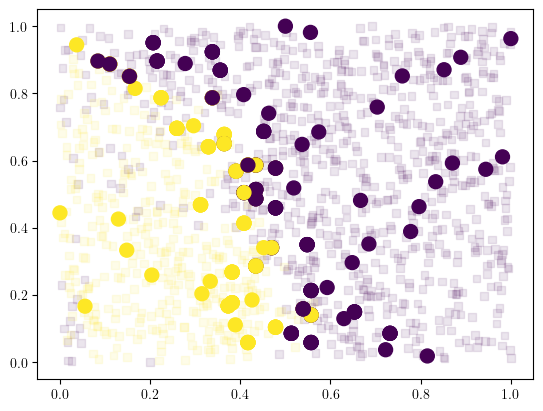

In [3]:
 # Plot initial training data
plt.figure()
plt.scatter(X_lf[:, 0], X_lf[:, 1], c=Y_lf, cmap='viridis', marker='s', s=30, alpha=0.1)
plt.scatter(X_hf[:, 0], X_hf[:, 1], c=Y_hf, cmap='viridis', marker='o', s=100)
plt.show()

In [4]:
# Create MF classifier instance
# Since data is already normalized, pass identity to denormalize for sampling_func
# Or, better, make sampling_func expect normalized inputs directly
X_lf = torch.from_numpy(X_lf).float()
X_hf = torch.from_numpy(X_hf).float()
Y_lf = torch.from_numpy(Y_lf).float()
Y_hf = torch.from_numpy(Y_hf).float()

model = BFGPC_ELBO(X_lf, X_hf)
model.train_model(X_lf, Y_lf, X_hf, Y_hf, n_epochs=1000)

Starting training...
Epoch 100/1000, Loss: 344.5564
  Rho: 1.0474
  LF model lengthscale: 0.3654, outputscale: 0.7211
  Delta model lengthscale: 0.3682, outputscale: 0.6204
Epoch 200/1000, Loss: 311.6770
  Rho: 1.3292
  LF model lengthscale: 0.2646, outputscale: 0.8853
  Delta model lengthscale: 0.2868, outputscale: 0.6812
Epoch 300/1000, Loss: 297.3190
  Rho: 1.4361
  LF model lengthscale: 0.2221, outputscale: 1.0604
  Delta model lengthscale: 0.2739, outputscale: 0.6926
Epoch 400/1000, Loss: 281.2820
  Rho: 1.4494
  LF model lengthscale: 0.2061, outputscale: 1.2479
  Delta model lengthscale: 0.2956, outputscale: 0.6641
Epoch 500/1000, Loss: 278.6663
  Rho: 1.4285
  LF model lengthscale: 0.2048, outputscale: 1.4358
  Delta model lengthscale: 0.3333, outputscale: 0.6138
Epoch 600/1000, Loss: 276.8564
  Rho: 1.4084
  LF model lengthscale: 0.2063, outputscale: 1.6182
  Delta model lengthscale: 0.3591, outputscale: 0.5654
Epoch 700/1000, Loss: 275.5232
  Rho: 1.3908
  LF model lengthscale

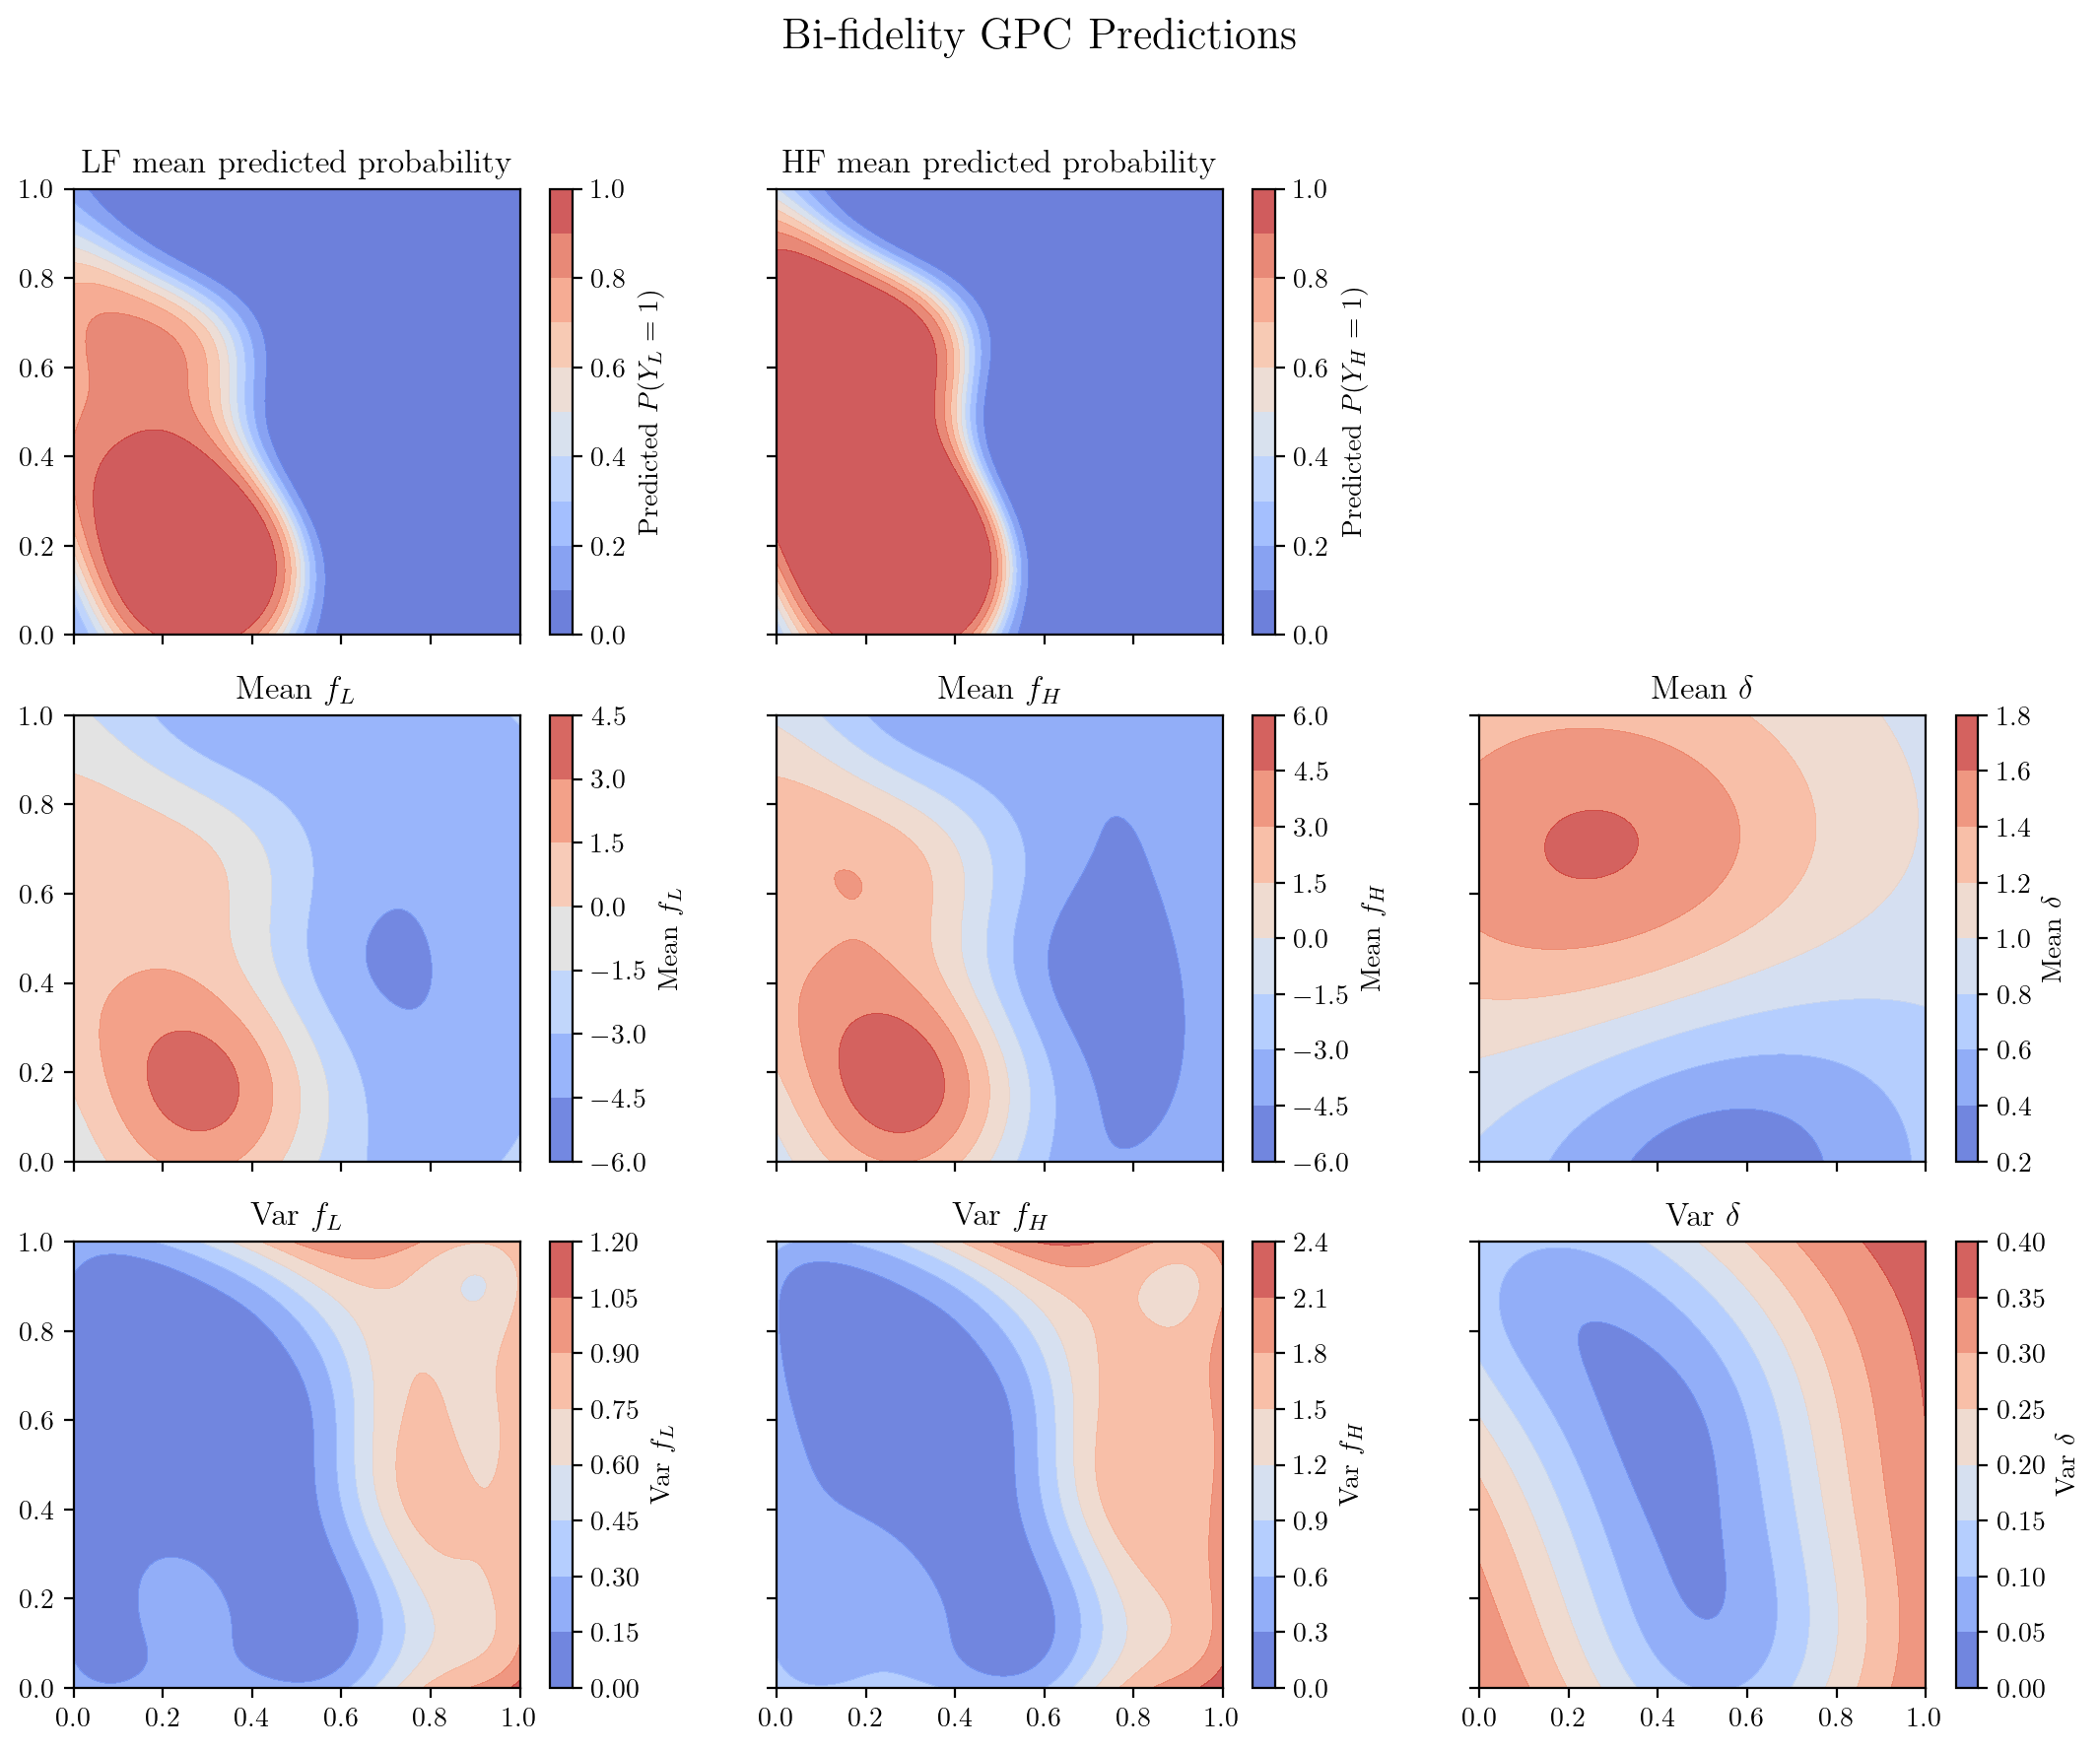

In [5]:
plot_bfgpc_predictions_two_axes(model)